In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

burgers_loss_correction = 0.37741058
advdif_loss_correction = 1.0

Error reduction: 0.6507160984309764
Error std.dev. reduction: 0.5603717801112479


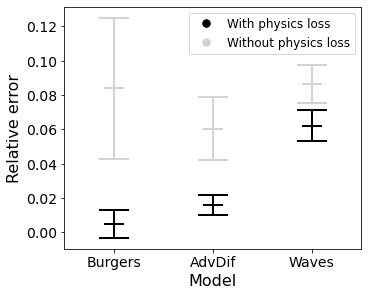

In [158]:
burgers_robustness = pd.read_csv('burgers_robustness.csv')
advdif_robustness = pd.read_csv('advdif_robustness.csv')
waves_robustness = pd.read_csv('waves_robustness.csv')

burgers_robustness['Lowest Rel Error'] = np.sqrt(burgers_robustness['Data loss lowest (validation)']/burgers_loss_correction)
advdif_robustness['Lowest Rel Error'] = np.sqrt(advdif_robustness['Data loss lowest (validation)']/advdif_loss_correction)

fig, ax = plt.subplots(1,1, figsize=(5,4), constrained_layout=True, facecolor='white')
#fig.suptitle('Robustness analysis', fontsize=16)

ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Relative error', fontsize=16)

mu1 = []
mu2 = []
sigma1 = []
sigma2 = []
def plot(df, ax, model):    
    x = df['alpha'].to_numpy()
    y = df['Lowest Rel Error'].to_numpy()
    mu1.append(np.mean(y[x == 0.0]))
    mu2.append(np.mean(y[x != 0.0]))
    sigma1.append(np.std(y[x == 0.0]))
    sigma2.append(np.std(y[x != 0.0]))
    ax.errorbar(model, np.mean(y[x == 0.0]), np.std(y[x == 0.0]), fmt='_--', elinewidth=2, capsize=15, ecolor='lightgrey', c='lightgrey', markeredgewidth=2, ms=20)
    ax.errorbar(model, np.mean(y[x != 0.0]), np.std(y[x != 0.0]), fmt='_--', elinewidth=2, capsize=15, ecolor='black', c='black', markeredgewidth=2, ms=20)
    #ax.scatter([model] * len(y[x == 0.0]), y[x == 0.0], c='lightgrey', s=5)
    #ax.scatter([model] * len(y[x != 0.0]), y[x != 0.0], c='black', s=5)

ax.set_xlim([-0.5, 2.5])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Burgers', 'AdvDif', 'Waves'])
ax.tick_params(labelsize=14)

plot(burgers_robustness, ax, 0)
plot(advdif_robustness, ax, 1)
plot(waves_robustness, ax, 2)
#plot(advdif_robustness, ax, 3)

legends = []
legends.append(plt.Line2D([0], [0], ls='', color='black', marker='.', ms=15, label='With physics loss'))
legends.append(plt.Line2D([0], [0], ls='', color='lightgrey', marker='.', ms=15, label='Without physics loss'))
ax.legend(handles=legends, fontsize=12)

plt.savefig('robustness.pdf')

mu1 = np.array(mu1)
mu2 = np.array(mu2)
sigma1 = np.array(sigma1)
sigma2 = np.array(sigma2)

print('Error reduction:', np.mean((mu1-mu2)/mu1))
print('Error std.dev. reduction:', np.mean((sigma1-sigma2)/sigma1))

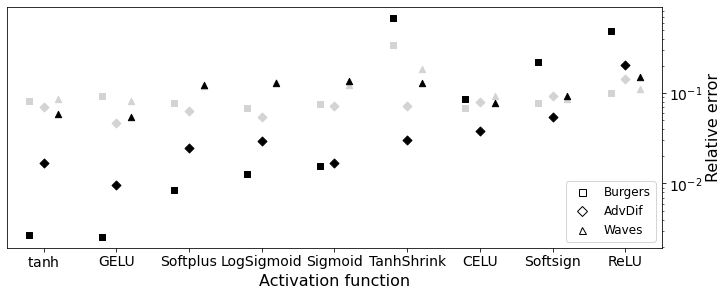

In [171]:
burgers_funcs = pd.read_csv('burgers_funcs.csv')
advdif_funcs = pd.read_csv('advdif_funcs.csv')
waves_funcs = pd.read_csv('waves_funcs.csv')

burgers_funcs['Lowest Rel Error'] = np.sqrt(burgers_funcs['Data loss lowest (validation)']/burgers_loss_correction)
advdif_funcs['Lowest Rel Error'] = np.sqrt(advdif_funcs['Data loss lowest (validation)']/advdif_loss_correction)


fig, ax = plt.subplots(1,1, figsize=(10,4), constrained_layout=True, facecolor='white')
#fig.suptitle('Robustness analysis', fontsize=16)

ax.set_xlabel('Activation function', fontsize=16)
ax.set_ylabel('Relative error', fontsize=16)

funcs = ['Tanh', 'GELU', 'Softplus', 'LogSigmoid', 'Sigmoid', 'TanhShrink', 'CELU', 'Softsign', 'ReLU']
def plot(df, ax, fmt, offset):
    for i, func in enumerate(funcs):
        y1 = df[(df['func'] == func.lower()) & (df['alpha'] == 0.0)]['Lowest Rel Error']
        y2 = df[(df['func'] == func.lower()) & (df['alpha'] != 0.0)]['Lowest Rel Error']
        ax.scatter([i+offset], y1.mean(), c='lightgrey', marker=fmt, s=40)
        ax.scatter([i+offset], y2.mean(), c='black', marker=fmt, s=40)
        #ax.errorbar([func], y1.mean(), y1.std(), fmt='_--', elinewidth=2, capsize=5, markeredgewidth=2, ms=7, ecolor='lightgrey', c='lightgrey')
        #ax.errorbar([func], y2.mean(), y2.std(), fmt='_--', elinewidth=2, capsize=5, markeredgewidth=2, ms=7, ecolor='black', c='black')

ax.set_xlim([-0.5, len(funcs)-0.5])
ax.set_xticks(range(len(funcs)))
ax.set_xticklabels(['$\mathrm{tanh}$', 'GELU', 'Softplus', 'LogSigmoid', 'Sigmoid', 'TanhShrink', 'CELU', 'Softsign', 'ReLU'])
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plot(burgers_funcs, ax, 's', -0.2)
plot(advdif_funcs, ax, 'D', 0.0)
plot(waves_funcs, ax, '^', 0.2)
#plot(advdif_funcs, ax, 'v', 0.20)

legends = []
#legends.append(plt.Line2D([0], [0], ls='', color='black', marker='.', ms=15, label='With physics loss'))
#legends.append(plt.Line2D([0], [0], ls='', color='lightgrey', marker='.', ms=15, label='Without physics loss'))
legends.append(plt.Line2D([0], [0], ls='', c='none', mec='black', marker='s', ms=7, label='Burgers'))
legends.append(plt.Line2D([0], [0], ls='', c='none', mec='black', marker='D', ms=7, label='AdvDif'))
legends.append(plt.Line2D([0], [0], ls='', c='none', mec='black', marker='^', ms=7, label='Waves'))
#legends.append(plt.Line2D([0], [0], ls='', c='none', mec='black', marker='v', ms=7, label='ShaWat'))
ax.legend(handles=legends, fontsize=12, loc='lower right')

plt.savefig('funcs.pdf')

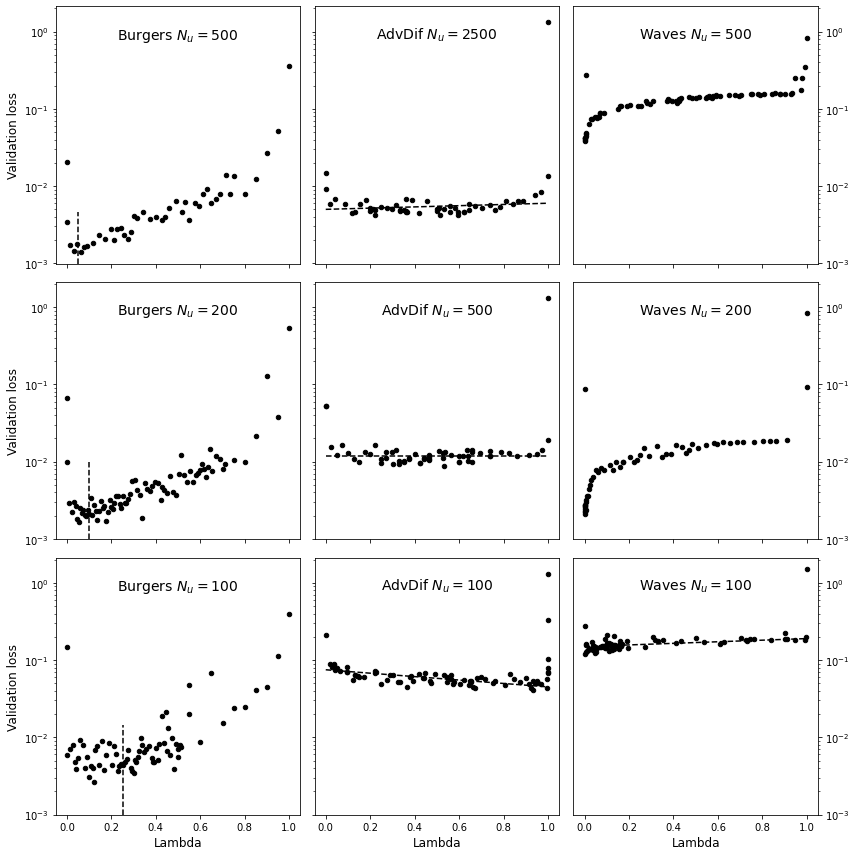

In [169]:
def plot(ax, j, i, df, title):
    x = df['alpha'].to_numpy().reshape(-1,1)
    y = df['Lowest Rel Error'].to_numpy()
        
    ax[j,i].set_title(title, fontsize=14, x=0.5, y=0.85)
    ax[j,i].set_yscale('log')
    if j == 2:
        ax[j,i].set_xlabel('Lambda', fontsize=12)
    if i == 0:
        ax[j,i].set_ylabel('Validation loss', fontsize=12)
    elif i == 2:        
        ax[j,i].yaxis.tick_right()
        ax[j,i].yaxis.set_tick_params(labelright=True)
    
    if title == 'Burgers $N_u = 500$':
        ax[j,i].axvline(0.05, 0.0, 0.2, ls='--', c='black')
    elif title == 'Burgers $N_u = 200$':
        ax[j,i].axvline(0.1, 0.0, 0.3, ls='--', c='black')
    elif title == 'Burgers $N_u = 100$':
        ax[j,i].axvline(0.25, 0.0, 0.35, ls='--', c='black')
    elif title == 'AdvDif $N_u = 2500$':
        ax[j,i].plot([0.0, 1.0], [5e-3, 6e-3], ls='--', c='black')
    elif title == 'AdvDif $N_u = 500$':
        ax[j,i].plot([0.0, 1.0], [1.2e-2, 1.2e-2], ls='--', c='black')
    elif title == 'AdvDif $N_u = 100$':
        ax[j,i].plot([0.0, 1.0], [7.5e-2, 4.5e-2], ls='--', c='black')
    #elif title == 'Waves $N_u = 500$':
        #ax[j,i].set_xscale('log')
    #elif title == 'Waves $N_u = 200$':
        #ax[j,i].set_xscale('log')
    elif title == 'Waves $N_u = 100$':
        ax[j,i].plot([0.0, 1.0], [0.15, 0.19], ls='--', c='black')
        
    ax[j,i].scatter(x, y, c='black', s=20)

burgers_Nu500 = pd.read_csv('burgers_Nu500.csv')[1:]
burgers_Nu200 = pd.read_csv('burgers_Nu200.csv')[1:]
burgers_Nu100 = pd.read_csv('burgers_Nu100.csv')[1:]
burgers_Nu50 = pd.read_csv('burgers_Nu50.csv')
advdif_Nu2500 = pd.read_csv('advdif_Nu2500.csv')[1:]
advdif_Nu500 = pd.read_csv('advdif_Nu500.csv')[1:]
advdif_Nu100 = pd.read_csv('advdif_Nu100.csv')[1:]
waves_Nu500 = pd.read_csv('waves_Nu500.csv')#[1:]
waves_Nu200 = pd.read_csv('waves_Nu200.csv')#[1:]
waves_Nu100 = pd.read_csv('waves_Nu100.csv')#[1:]

burgers_Nu500['Lowest Rel Error'] = np.sqrt(burgers_Nu500['Data loss lowest (validation)']/burgers_loss_correction)
burgers_Nu200['Lowest Rel Error'] = np.sqrt(burgers_Nu200['Data loss lowest (validation)']/burgers_loss_correction)
burgers_Nu100['Lowest Rel Error'] = np.sqrt(burgers_Nu100['Data loss lowest (validation)']/burgers_loss_correction)
burgers_Nu50['Lowest Rel Error'] = np.sqrt(burgers_Nu50['Data loss lowest (validation)']/burgers_loss_correction)
advdif_Nu2500['Lowest Rel Error'] = np.sqrt(advdif_Nu2500['Data loss lowest (validation)']/advdif_loss_correction)
advdif_Nu500['Lowest Rel Error'] = np.sqrt(advdif_Nu500['Data loss lowest (validation)']/advdif_loss_correction)
advdif_Nu100['Lowest Rel Error'] = np.sqrt(advdif_Nu100['Data loss lowest (validation)']/advdif_loss_correction)

fig, ax = plt.subplots(3,3, figsize=(12,12), tight_layout=True, squeeze=False, facecolor='white', sharex=True, sharey=True)
#fig.suptitle('Advection-Diffusion weight analysis', fontsize=16)
fig.subplots_adjust(wspace=0)

plot(ax, 0, 0, burgers_Nu500, 'Burgers $N_u = 500$')
plot(ax, 1, 0, burgers_Nu200, 'Burgers $N_u = 200$')
plot(ax, 2, 0, burgers_Nu100, 'Burgers $N_u = 100$')
plot(ax, 0, 1, advdif_Nu2500, 'AdvDif $N_u = 2500$')
plot(ax, 1, 1, advdif_Nu500, 'AdvDif $N_u = 500$')
plot(ax, 2, 1, advdif_Nu100, 'AdvDif $N_u = 100$')
plot(ax, 0, 2, waves_Nu500, 'Waves $N_u = 500$')
plot(ax, 1, 2, waves_Nu200, 'Waves $N_u = 200$')
plot(ax, 2, 2, waves_Nu100, 'Waves $N_u = 100$')

plt.savefig('lambda.pdf')